In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns

## Datos

In [55]:
df = pd.read_excel('./data/dieta_oscar_MCD.xlsx')
df.shape

(319, 146)

In [56]:
df.sample(3)

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
170,2016-211,A,Male,AZ,2.5398,0.0,0.0,0.0000,0.0292,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217779,NaN,NaN
252,2014-60,A,Female,NM,2.0904,0.0,0.0,0.0000,0.0000,0.0,...,10.0,611.16,347.0,14.020833,1643.0,32.381441,-108.357641,0.850354,0.688753,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...
255,2014-65,J,Female,NM,2.1685,0.0,0.0,1.8085,0.0000,0.0,...,15.0,6.40,431.0,11.070833,2027.0,32.897620,-107.944433,0.616340,0.849663,Rocky Mountain Ponderosa Pine Woodland


## Separacion de datos

In [57]:
columnas = df.columns.to_list()

var_name = columnas[:5] + columnas[-11:]
var_name.remove('gap')
vars_dieta_codorniz = columnas[5:-11]

In [58]:
df[var_name]

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,1700.0,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,1610.0,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,1600.0,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-59,A,Female,NM,0.3501,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,2015-6,J,Female,NM,0.1977,1230.0,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2015-60,J,Female,NM,2.6084,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,2015-61,A,Male,NM,7.3265,1430.0,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [59]:
df[vars_dieta_codorniz].sample(3)

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
190,0.0,0.0,0.0,0.0210,0.0234,0.0,0.0023,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0281,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,1.2051,0.0899,0.0,0.1300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df[var_name].sample(3)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
18,2016-152,J,Male,AZ,3.0839,1500.0,NaN,57.94,482.0,17.0000,1226.0,31.380497,-111.072099,1.841076,1.067677
211,2014-22,J,Female,NM,0.8383,1530.0,8.0,253.42,355.0,13.7875,1641.0,32.799302,-107.593281,1.002555,0.852203
110,2015-62,A,Male,NM,5.1539,1430.0,8.0,763.38,332.0,14.2250,1560.0,32.592245,-107.930243,0.154973,0.761439


## Transformación

In [61]:
df['edad'].value_counts(dropna=False)

edad
J      165
NaN     87
A       67
Name: count, dtype: int64

In [62]:
# Variable: time
# Pasa el formato actual a tipo time con formato hh:mm:ss
def convertir_a_formato_de_24_horas(valor):
    if pd.isna(valor):
        return np.nan
    horas, minutos = divmod(int(valor), 100)
    return time(horas, minutos)

df['time'] = df['time'].apply(convertir_a_formato_de_24_horas)


In [63]:
df[var_name].sample(5)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
74,2016-170,NaN,Male,AZ,3.41980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.763731,NaN
165,2016-191,NaN,NaN,AZ,1.85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502276,NaN
197,2014-102,J,Male,NM,1.66329,10:00:00,8.0,536.78,324.0,14.454167,1591.0,32.330533,-108.269338,0.039978,0.903845
287,2015-13,J,Male,NM,6.08590,12:45:00,15.0,633.63,354.0,14.125000,1696.0,32.514658,-107.168737,0.296121,0.904752
176,2016-225,NaN,NaN,AZ,0.34720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997423,NaN


In [64]:
print('Estado: ',(df['estado'].unique()))
print('Sexo: ',(df['sexo'].unique()))

Estado:  ['NM' 'AZ' 'Az']
Sexo:  ['Female' 'Male' nan 'male' 'Male ']


In [65]:
df['estado'] = df['estado'].str.upper()
df['estado'].value_counts(dropna=False)

estado
AZ    177
NM    142
Name: count, dtype: int64

In [66]:
df['sexo'] = df['sexo'].apply(lambda x: x.strip().capitalize() if pd.notna(x) else x)
df['sexo'].value_counts(dropna=False)

sexo
Male      173
Female    104
NaN        42
Name: count, dtype: int64

In [67]:
df['dist camino'].isna().value_counts(dropna=False)

dist camino
False    221
True      98
Name: count, dtype: int64

### Valores vacios

In [68]:
# Encuentra las columnas con NaN
columnas_con_nan = df.columns[df.isna().any()].tolist()

# Calcula la cantidad de NaN por columna
nan_por_columna = df[columnas_con_nan].isna().sum()

# Crea el gráfico de barras
fig = px.bar(x=columnas_con_nan, y=nan_por_columna,
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

In [69]:
nan_por_columna

edad               87
sexo               42
Quercus             1
Cyp.bulb            2
Lotus.wrightii      1
Fabacea             1
SP34                1
SPA33               1
SPA55               2
Bothriochloa.1      1
time               87
covey             129
dist camino        98
ppanual17          98
tmedia17           98
altitud            98
lat                98
lon                98
hland              99
gap                98
dtype: int64

### GAP

In [70]:
frecuencia_gap = df['gap'].value_counts(dropna=False).sort_values(ascending=True)
frecuencia_gap = frecuencia_gap.reset_index()  
frecuencia_gap.columns = ['gap', 'Frecuencia'] 
frecuencia_gap['gap'] = frecuencia_gap['gap'].astype(str)
frecuencia_gap

,gap,Frecuencia
0,North American Warm Desert Bedrock Cliff and O...,1
1,Rocky Mountain Gambel Oak-Mixed Montane Shrubland,2
2,North American Warm Desert Wash,3
3,Chihuahuan Mixed Salt Desert Scrub,3
4,Southern Rocky Mountain Pinyon-Juniper Woodland,5
5,"Chihuahuan Creosotebush, Mixed Desert and Thor...",7
6,Mogollon Chaparral,7
7,Madrean Juniper Savanna,8
8,Rocky Mountain Ponderosa Pine Woodland,12
9,Apacherian-Chihuahuan Mesquite Upland Scrub,18


In [71]:
fig = px.bar(frecuencia_gap, x='Frecuencia', y='gap', orientation='h',
             labels={'gap': 'Ubicación', 'Frecuencia': 'Frecuencia'},
             title='Frecuencia de gap')

fig.show()

Se decidió omitir la variable gap ya que no la consideramos de relevancia para el análisis.

In [72]:
df.drop(columns=['gap'], inplace=True)

In [73]:
df.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,17:00:00,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,16:10:00,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,16:00:00,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562


In [74]:
df[var_name].describe()

,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,2.084231,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,1.718818,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.704350,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,1.776000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,3.001150,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,9.758400,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


In [75]:
df[var_name]

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,2014-104,J,Female,NM,9.7584,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,2014-105,J,Male,NM,3.9632,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,2016-133,A,Female,AZ,5.4562,17:00:00,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,2014-28,J,Female,NM,4.4976,16:10:00,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,2016-132,J,Male,AZ,5.4630,16:00:00,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-59,A,Female,NM,0.3501,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,2015-6,J,Female,NM,0.1977,12:30:00,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2015-60,J,Female,NM,2.6084,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,2015-61,A,Male,NM,7.3265,14:30:00,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [76]:
df['edad'].fillna('Desconocido', inplace=True)
columnas_con_nan = df.columns[df.isna().any()].tolist()
nan_por_columna = df[columnas_con_nan].isna().sum()

fig = px.bar(x=columnas_con_nan, y=nan_por_columna[columnas_con_nan],
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()


C:\Users\EstephaniaPivacAlcar\AppData\Local\Temp\ipykernel_10256\85884551.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Dieta de codornices

In [82]:
df_dieta = df[vars_dieta_codorniz]

In [83]:
df_dieta

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
0,9.7584,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.0000,0.6148,0.0726,0.0,0.0514,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.0000,0.0000,0.0000,0.0,0.7900,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.7780,0.3908,0.0000,0.0,0.0027,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0000,0.0,0.3501,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0000,0.0,2.5800,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0000,0.0,0.0000,7.3265,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Basándonos en el análisis propuesto en la tesis, se decidió agrupar las variables de especies de comida con menores proporciones en la dieta de las codornices, creando una columna llamada "otros"

In [108]:
# Agrupamos las especies
df_grouped = pd.DataFrame()
df_grouped['Euphorbia'] = df['Euphorbia']+df['Euphorbia.1']+df['Euphorbia.2'] #+df['Euphorbia.exstipulata']+df['Euphorbia probably E. bilobata']
df_grouped['Phaseolus'] = df['Phaseolus'] + df['Phaseolus.1']
df_grouped['Setaria'] = df['Setaria'] + df['Setaria.1'] #+ df['Setaria nigricans']
df_grouped[['Cyperus.fendlerianus','Quercus','Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']] = df[['Cyperus.fendlerianus', 'Quercus', 'Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']]

# Definir una lista de columnas a evitar
columnas_evitar = ['Euphorbia', 'Euphorbia.1', 'Euphorbia.2', 'Phaseolus', 'Phaseolus.1', 'Setaria', 'Setaria.1', 'Cyperus.fendlerianus','Quercus','Cyp.bulb', 'Oxalis', 'Insectos', 'Paspalum.distichum', 'Physalis']

# Crear una lista de columnas agrupadas, excluyendo las columnas a evitar
lista_columnas_agrupadas = [elemento for elemento in vars_dieta_codorniz if elemento not in columnas_evitar]
# Calcular la suma de las columnas seleccionadas en 'lista_columnas_agrupadas' del DataFrame original 'df' y asignarla a la columna 'Otros' en 'df_grouped'
df_grouped['Otros'] = df[lista_columnas_agrupadas].sum(axis=1)

# Asignar las columnas de 'var_name' del DataFrame original 'df' al DataFrame 'df_grouped'
df_grouped[var_name] = df[var_name]
# Eliminar la columna 'time' del DataFrame 'df_grouped'
df_grouped = df_grouped.drop(columns=['time'])

df_grouped

,Euphorbia,Phaseolus,Setaria,Cyperus.fendlerianus,Quercus,Cyp.bulb,Oxalis,Insectos,Paspalum.distichum,Physalis,...,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,0.0,0.0000,0.0,0.0000,0.0,0.0000,9.7584,0.0000,0.0000,0.0000,...,9.7584,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,0.0,0.0000,0.0,0.0000,0.0,0.0000,3.9632,0.0000,0.0000,0.0000,...,3.9632,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,0.0,0.6148,0.0,0.0000,0.0,0.0000,3.8238,0.0514,0.0000,0.0000,...,5.4562,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,0.0,0.0000,0.0,0.0000,0.0,0.0000,3.7076,0.7900,0.0000,0.0000,...,4.4976,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,0.0,0.3908,0.0,0.0000,0.0,0.7780,2.2011,0.0027,0.0024,0.0000,...,5.4630,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0,0.0000,0.0,0.0000,0.0,0.3501,0.0000,0.0000,0.0000,0.0000,...,0.3501,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,0.0,0.0000,0.0,0.0053,0.0,0.0000,0.0000,0.0000,0.0000,0.0339,...,0.1977,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,0.0,0.0000,0.0,0.0000,0.0,2.5800,0.0000,0.0000,0.0000,0.0000,...,2.6084,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,0.0,7.3265,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.3265,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [109]:
df_grouped.describe()

,Euphorbia,Phaseolus,Setaria,Cyperus.fendlerianus,Quercus,Cyp.bulb,Oxalis,Insectos,Paspalum.distichum,Physalis,...,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,319.000000,319.000000,319.000000,318.000000,317.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,0.002866,0.319438,0.024885,0.019694,0.391575,0.194748,0.097181,0.113014,0.069161,0.035234,...,2.084231,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,0.018548,1.021767,0.196809,0.075140,0.873040,0.626539,0.681455,0.384408,0.456589,0.303878,...,1.718818,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.704350,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.776000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,0.000000,0.091750,0.000000,0.000550,0.134650,0.000000,0.000000,0.030000,0.000000,0.000000,...,3.001150,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,0.192700,7.326500,2.553300,0.656100,4.382100,6.723300,9.758400,2.900000,4.769700,4.471900,...,9.758400,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


In [113]:
corr_matrix = df_grouped.select_dtypes(include='number').corr()

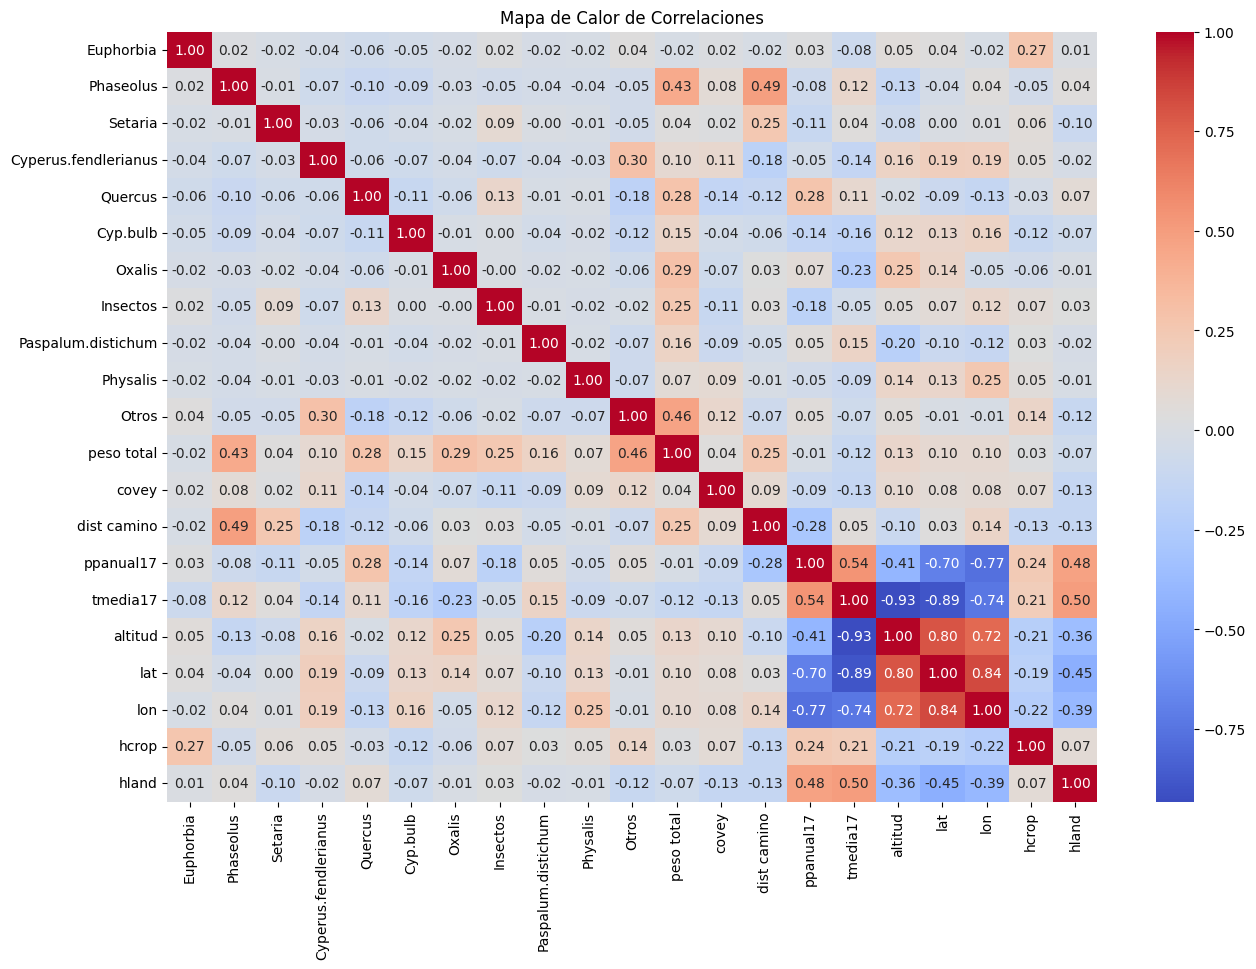

In [121]:
# Crear el mapa de calor de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()